### **AQI-ExtraTreesRegressor**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Before appling linear regression, I did feature engineering such as dealig with outliers, null values and correlation analysis. After that data has saven into cleaned data format.

### **Import necessary libraries**

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
with open('/content/drive/MyDrive/Google_colab_project/df.pkl','rb') as file:
    df= pickle.load(file)

In [4]:
#Read value
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,10.8,16.3,5.2,1017.6,93.0,0.5,4.3,9.4,219.720833
1,10.8,16.3,5.2,1018.5,87.0,0.6,4.4,11.1,182.187500
2,10.8,16.3,5.2,1019.4,82.0,0.6,4.8,11.1,154.037500
3,10.8,16.3,5.2,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,5.2,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
#Seperating dependent and independent variables 
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

### **ExtraTreesRegressor Implementation without Hyper Tuning**

In [7]:
from sklearn import ensemble
extra_tree=ensemble.ExtraTreesRegressor
extra_tree_model = extra_tree(n_estimators=100, n_jobs=-1, random_state=100)

### **Compile model**

In [9]:
extra_tree_model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=100, verbose=0, warm_start=False)

### **Evalution Model**

In [10]:
from sklearn import metrics
tree_pred=extra_tree_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, tree_pred))
print('MSE:', metrics.mean_squared_error(y_test, tree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

MAE: 17.416967085235953
MSE: 1112.8571151511208
RMSE: 33.35951311322035


For Extra TreeRegressor without any hyperparameter tuning, we got RMSE(Root Mean Square Error) value is around 33.4 which is lower than SVR-linear kernel and SVR-polynomial kernel and linear regressor RMSE values. So, next, we will try to find some optimal parameters for Extra TreeRegressthrough we can able to reduce that RMSE value.

In [31]:
#plot the importances #
importances = extra_tree_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in extra_tree_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]

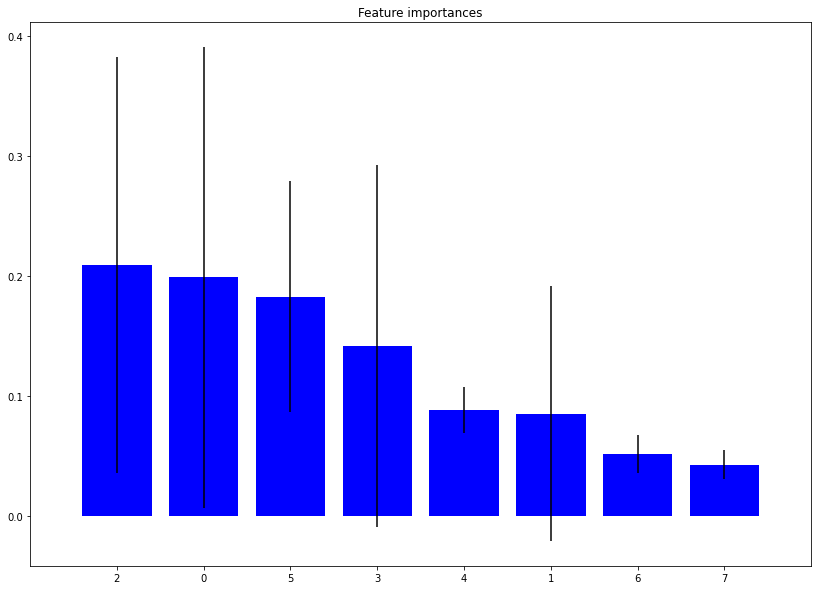

In [34]:
plt.figure(figsize=(14,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
plt.show()

### **ExtraTreesRegressor Implementation with Hyper Tuning-Randomized SearchCV**

### Randomized SearchCV1

In [23]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 12)]
# Number of criterion
criterion=["mse", "mae"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 50, num = 6)]
# Minimum samples weight parameters
min_samples_split=[3,4,5,6,7]
# Minimum samples leaf parameters
min_samples_leaf=[1,2,3]
# features type 
max_features=["auto","sqrt", "log2"]



In [24]:
# Create the random grid
tree_random_grid1 = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'min_samples_split':min_samples_split}

print(tree_random_grid1)

{'n_estimators': [100, 145, 190, 236, 281, 327, 372, 418, 463, 509, 554, 600], 'criterion': ['mse', 'mae'], 'max_depth': [20, 26, 32, 38, 44, 50], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [3, 4, 5, 6, 7]}


In [25]:
extra_tree_regressor1=ensemble.ExtraTreesRegressor()

In [26]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
# Use the random grid to search for best hyperparameters
# First create the base model to tune

tree_random_cv1 = RandomizedSearchCV(estimator = extra_tree_regressor1, param_distributions = tree_random_grid1,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)
#xgb_random.fit(X_train,y_train)

In [27]:
tree_random_cv1.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae, total=   0.6s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae, total=   0.7s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae, total=   0.6s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae, total=   0.6s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=2, max_features=sqrt, max_depth=44, criterion=mae, total=   0.6s
[CV] n_estimators=236, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=50, criterion=mae 
[CV]  n_estimators=236, min_samples_split=4,

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  8.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False...
                   para

In [28]:
print(tree_random_cv1.best_params_)
#print(tree_random_cv1.best_scores_)

{'n_estimators': 509, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 26, 'criterion': 'mae'}


### **Model Evaluation-1**

In [29]:
tree_rcv1_prediction=tree_random_cv1.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, tree_rcv1_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv1_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv1_prediction)))

MAE: 18.85145237700092
MSE: 1150.7767015218349
RMSE: 33.92309982182989


### Randomized SearchCV2

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 800, num = 12)]
# Number of criterion
criterion=["mse", "mae"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 50, num = 10)]
# Minimum samples weight parameters
min_samples_split=[3,4,5]
# Minimum samples leaf parameters
min_samples_leaf=[1,2]
# features type 
max_features=["log2"]


In [47]:
# Create the random grid
tree_random_grid2= {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
               'min_samples_split':min_samples_split}

print(tree_random_grid2)

{'n_estimators': [300, 345, 390, 436, 481, 527, 572, 618, 663, 709, 754, 800], 'criterion': ['mse', 'mae'], 'max_depth': [20, 23, 26, 30, 33, 36, 40, 43, 46, 50], 'min_samples_leaf': [1, 2], 'max_features': ['log2'], 'min_samples_split': [3, 4, 5]}


In [48]:
extra_tree_regressor2=ensemble.ExtraTreesRegressor()

In [49]:

tree_random_cv2 = RandomizedSearchCV(estimator = extra_tree_regressor2, param_distributions = tree_random_grid2,
                               scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, 
                               random_state=100, n_jobs = 1)

In [50]:
tree_random_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae, total=   2.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae, total=   2.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae, total=   2.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae, total=   2.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=46, criterion=mae, total=   2.4s
[CV] n_estimators=345, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, criterion=mse 
[CV]  n_estimators=345, min_samples_split=5,

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 10.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False...
                   para

In [51]:
print(tree_random_cv2.best_params_)

{'n_estimators': 663, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 46, 'criterion': 'mse'}


### **Model Evaluation-2**

In [39]:
tree_rcv2_prediction=tree_random_cv2.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, tree_rcv2_prediction))
print('MSE:', metrics.mean_squared_error(y_test, tree_rcv2_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tree_rcv2_prediction)))

MAE: 18.172227571188355
MSE: 1117.5093773040867
RMSE: 33.42916955750003


### **ExtraTreesRegressor Implementation with Hyper Tuning-GridSerchCV-1 Tuning**

In [53]:
extra_tree_rcv_1=ensemble.ExtraTreesRegressor()

In [56]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
## Hyper Parameter Optimization

params_gridcv1={
  "n_estimators": [int(x) for x in np.linspace(start = 550, stop = 800, num = 6)],
  "criterion":["mse", "mae"],
  "max_depth": [int(x) for x in np.linspace(36, 66, num = 5)],
# Minimum samples weight parameters
  "min_samples_split":[3,4,5],
# Minimum samples leaf parameters
  "min_samples_leaf":[1],
# features type 
  "max_features":["log2"]
  
}

In [57]:
tree_gcv_1=GridSearchCV( extra_tree_rcv_1,param_grid=params_gridcv1,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=10)


In [58]:
tree_gcv_1.fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2

GridSearchCV(cv=10, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, rand...e=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gr

In [59]:
from sklearn import metrics
gcv1_prediction_1=tree_gcv_1.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, gcv1_prediction_1))
print('MSE:', metrics.mean_squared_error(y_test, gcv1_prediction_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gcv1_prediction_1)))

MAE: 19.168948833985706
MSE: 1185.3475699794517
RMSE: 34.4288769781916


In [62]:
import pickle
# open a file, where you ant to store the data
file = open('tree_gridcv.pkl', 'wb')

# dump information to that file
pickle.dump(tree_gcv_1, file)

In [63]:
import pickle
# open a file, where you ant to store the data
file = open('tree_randomcv2.pkl', 'wb')

# dump information to that file
pickle.dump(tree_random_cv2, file)